In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import joblib
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from pandas import Series, DataFrame

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge,RidgeCV#线性回归模型的岭回归
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# from sklearn.externals import joblib
from sklearn.utils import shuffle
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier     #随机森林用于分类
from sklearn.ensemble import RandomForestRegressor as RFR      #随机森林用于回归
from sklearn.model_selection import train_test_split           #划分训练集与测试集
from sklearn import metrics    
from sklearn.metrics import r2_score              #用于模型拟合优度评估
from collections import Counter


In [3]:
data = pd.read_excel('Data/Cp-Rdkit+Mordred_only-1279-106-filter_afterprogress.xlsx',index_col=0)
random_data = shuffle(data)
data

,NAME,Cp,Temperature,ATS0s,ATS0pe,AATS2dv,AATS1d,AATS1s,AATS0m,AATS2i,...,BCUT2D_MRLOW,HallKierAlpha,Kappa2,Kappa3,SMR_VSA5,VSA_EState8,FractionCSP3,NumHAcceptors,NumHeteroatoms,MolLogP
0,56-23-5,131.3,298.15,8.805908,46.4449,0.604938,4.000000,1.682099,1034.214824,168.159428,...,1.755507,1.16,1.741848,38.291986,3.251718,0.000000,1.0,0,4,2.5529
1,56-23-5,133.1,301.20,8.805908,46.4449,0.604938,4.000000,1.682099,1034.214824,168.159428,...,1.755507,1.16,1.741848,38.291986,3.251718,0.000000,1.0,0,4,2.5529
2,56-23-5,130.5,303.30,8.805908,46.4449,0.604938,4.000000,1.682099,1034.214824,168.159428,...,1.755507,1.16,1.741848,38.291986,3.251718,0.000000,1.0,0,4,2.5529
3,56-23-5,131.5,293.00,8.805908,46.4449,0.604938,4.000000,1.682099,1034.214824,168.159428,...,1.755507,1.16,1.741848,38.291986,3.251718,0.000000,1.0,0,4,2.5529
4,56-81-5,218.9,298.15,122.277778,93.7283,2.571429,2.538462,4.256410,86.344634,162.572728,...,0.045021,-0.12,3.084918,2.137732,6.103966,-0.729167,1.0,3,3,-1.6681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,92369-83-0,358.6,313.00,59.111111,216.8750,1.226190,3.170732,1.792005,51.152884,152.153115,...,0.089775,0.00,4.680000,2.323200,65.214047,4.790553,1.0,0,0,4.6390
1392,500005-27-6,224.7,298.15,51.250000,114.2597,1.125000,2.111111,2.722222,65.549967,169.457468,...,0.077671,-0.08,5.920000,5.920000,6.923737,4.166528,1.0,2,2,0.6693
1393,500005-28-7,248.9,298.15,55.500000,130.4422,1.157895,2.190476,2.583333,63.261165,167.022136,...,0.070992,-0.08,6.920000,5.920000,13.344559,4.375499,1.0,2,2,1.0594
1394,500005-29-8,282.0,298.15,59.750000,146.6247,1.090909,2.250000,2.479167,61.521675,165.250986,...,0.069210,-0.08,7.920000,7.920000,19.765380,4.471979,1.0,2,2,1.4495


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.7s finished


交叉验证Running time: 0:02:15.284192 Seconds
2


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished


交叉验证Running time: 0:02:17.221970 Seconds
3


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


交叉验证Running time: 0:02:36.688080 Seconds
4


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


交叉验证Running time: 0:02:38.337604 Seconds
5


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished


交叉验证Running time: 0:02:30.482011 Seconds
6


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


交叉验证Running time: 0:02:29.790135 Seconds
7


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished


交叉验证Running time: 0:03:55.053045 Seconds
8


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.3s finished


交叉验证Running time: 0:03:59.728489 Seconds
9


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.0s finished


交叉验证Running time: 0:03:40.261787 Seconds
10


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished


交叉验证Running time: 0:03:15.126070 Seconds
11


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.9s finished


交叉验证Running time: 0:04:23.395560 Seconds
12


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


交叉验证Running time: 0:04:09.161331 Seconds
13


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.7s finished


交叉验证Running time: 0:03:21.683838 Seconds
14


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.6s finished


交叉验证Running time: 0:02:30.717971 Seconds
15


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished


交叉验证Running time: 0:03:02.190145 Seconds
16


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished


交叉验证Running time: 0:02:56.975047 Seconds
17


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.5s finished


交叉验证Running time: 0:02:35.081539 Seconds
18


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished


交叉验证Running time: 0:02:51.784518 Seconds
19


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.0s finished


交叉验证Running time: 0:02:58.336899 Seconds
20


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.7s finished


交叉验证Running time: 0:02:50.116266 Seconds
21


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.0s finished


交叉验证Running time: 0:02:20.354707 Seconds
22


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.6s finished


交叉验证Running time: 0:03:01.581074 Seconds
23


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.6s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.8s finished


交叉验证Running time: 0:02:54.349421 Seconds
24


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.0s finished


交叉验证Running time: 0:02:39.149548 Seconds
25


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished


交叉验证Running time: 0:02:26.592026 Seconds
26


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.6s finished


交叉验证Running time: 0:02:55.788550 Seconds
27


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


交叉验证Running time: 0:02:42.706806 Seconds
28


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.2s finished


交叉验证Running time: 0:02:25.945182 Seconds
29


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.9s finished


交叉验证Running time: 0:02:16.066587 Seconds
30


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.5s finished


交叉验证Running time: 0:02:49.346648 Seconds
31


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished


交叉验证Running time: 0:02:44.658475 Seconds
32


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.5s finished


交叉验证Running time: 0:02:26.210016 Seconds
33


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished


交叉验证Running time: 0:02:14.986287 Seconds
34


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.7s finished


交叉验证Running time: 0:02:44.455237 Seconds
35


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.9s finished


交叉验证Running time: 0:02:28.210416 Seconds
36


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.2s finished


交叉验证Running time: 0:02:33.628058 Seconds
37


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.7s finished


交叉验证Running time: 0:02:14.519239 Seconds
38


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.9s finished


交叉验证Running time: 0:02:49.291830 Seconds
39


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished


交叉验证Running time: 0:02:35.821907 Seconds
40


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished


交叉验证Running time: 0:02:21.884771 Seconds
41


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.3s finished


交叉验证Running time: 0:02:07.849976 Seconds
42


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.7s finished


交叉验证Running time: 0:02:39.141228 Seconds
43


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.0s finished


交叉验证Running time: 0:02:41.153462 Seconds
44


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.3s finished


交叉验证Running time: 0:02:18.203822 Seconds
45


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.6s finished


交叉验证Running time: 0:01:59.238983 Seconds
46


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.7s finished


交叉验证Running time: 0:02:31.122193 Seconds
47


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.9s finished


交叉验证Running time: 0:02:25.411149 Seconds
48


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


交叉验证Running time: 0:02:06.864883 Seconds
49


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.6s finished


交叉验证Running time: 0:02:03.605540 Seconds
50


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


交叉验证Running time: 0:02:16.230217 Seconds
51


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.2s finished


交叉验证Running time: 0:02:13.732771 Seconds
52


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.2s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.8s finished


交叉验证Running time: 0:02:05.203815 Seconds
53


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished


交叉验证Running time: 0:01:47.075521 Seconds
54


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished


交叉验证Running time: 0:02:20.079974 Seconds
55


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished


交叉验证Running time: 0:02:15.599517 Seconds
56


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


交叉验证Running time: 0:01:59.907525 Seconds
57


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished


交叉验证Running time: 0:01:46.374190 Seconds
58


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.7s finished


交叉验证Running time: 0:02:05.288743 Seconds
59


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.2s finished


交叉验证Running time: 0:02:03.914470 Seconds
60


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.7s finished


交叉验证Running time: 0:01:53.678938 Seconds
61


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


交叉验证Running time: 0:01:46.912022 Seconds
62


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished


交叉验证Running time: 0:01:42.719974 Seconds
63


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.1s finished


交叉验证Running time: 0:01:49.941624 Seconds
64


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.9s finished


交叉验证Running time: 0:01:48.806130 Seconds
65


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


交叉验证Running time: 0:01:46.988452 Seconds
66


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


交叉验证Running time: 0:01:37.371625 Seconds
67


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished


交叉验证Running time: 0:01:32.645747 Seconds
68


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.5s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.0s finished


交叉验证Running time: 0:01:43.193131 Seconds
69


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.6s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.9s finished


交叉验证Running time: 0:01:42.748224 Seconds
70


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.9s finished


交叉验证Running time: 0:01:29.849179 Seconds
71


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.3s finished


交叉验证Running time: 0:01:29.070343 Seconds
72


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.8s finished


交叉验证Running time: 0:01:20.308767 Seconds
73


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.5s finished


交叉验证Running time: 0:01:39.011265 Seconds
74


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished


交叉验证Running time: 0:01:30.558454 Seconds
75


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.6s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.0s finished


交叉验证Running time: 0:01:23.394265 Seconds
76


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.0s finished


交叉验证Running time: 0:01:20.324212 Seconds
77


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


交叉验证Running time: 0:01:10.802688 Seconds
78


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.2s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished


交叉验证Running time: 0:01:06.597256 Seconds
79


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.2s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.9s finished


交叉验证Running time: 0:01:20.346645 Seconds
80


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.2s finished


交叉验证Running time: 0:01:14.704431 Seconds
81


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.2s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished


交叉验证Running time: 0:01:11.904631 Seconds
82


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.0s finished


交叉验证Running time: 0:01:04.028983 Seconds
83


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.7s finished


交叉验证Running time: 0:01:00.196277 Seconds
84


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.6s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.1s finished


交叉验证Running time: 0:00:59.290852 Seconds
85


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.6s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.9s finished


交叉验证Running time: 0:00:49.930160 Seconds
86


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


交叉验证Running time: 0:00:45.629504 Seconds
87


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.9s finished


交叉验证Running time: 0:00:52.752343 Seconds
88


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.9s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished


交叉验证Running time: 0:00:48.913899 Seconds
89


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.9s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.1s finished


交叉验证Running time: 0:00:48.037826 Seconds
90


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.5s finished


交叉验证Running time: 0:00:45.035922 Seconds
91


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.5s finished


交叉验证Running time: 0:00:42.567934 Seconds
92


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.8s finished


交叉验证Running time: 0:00:37.311022 Seconds
93


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.3s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished


交叉验证Running time: 0:00:35.281452 Seconds
94


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.5s finished


交叉验证Running time: 0:00:32.303902 Seconds
95


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.9s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.3s finished


交叉验证Running time: 0:00:23.775916 Seconds
96


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.9s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished


交叉验证Running time: 0:00:24.334263 Seconds
97


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.6s finished


交叉验证Running time: 0:00:21.023729 Seconds
98


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.0s finished


交叉验证Running time: 0:00:16.334337 Seconds
99


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished


交叉验证Running time: 0:00:12.291536 Seconds
100


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.7s finished


交叉验证Running time: 0:00:13.695398 Seconds
101


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished


交叉验证Running time: 0:00:11.378690 Seconds
102


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.3s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.9s finished


交叉验证Running time: 0:00:06.762086 Seconds
103


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.9s finished


交叉验证Running time: 0:00:03.955120 Seconds
104


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.0s remaining:    4.0s


Running time: 3:25:24.494857 Seconds


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.0s finished


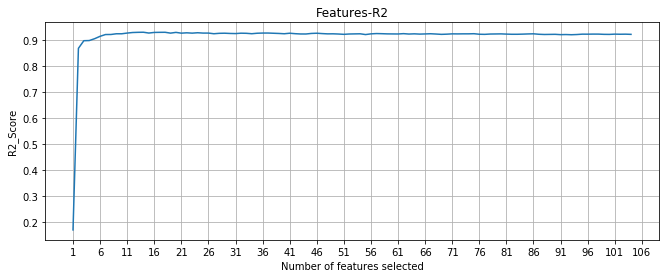

In [27]:
from sklearn.feature_selection import RFE
from pylab import xticks,yticks,np
from sklearn.model_selection import cross_val_score  # 交叉验证
from joblib import Parallel, delayed


# 定义并行函数
def parallel_rfe(selector, X, y):
    result = selector.fit_transform(X, y)
    return result,selector.support_


starttime = datetime.now()

# 定义一个准确率
high_score=0
# 最优需要多少个特征变量
num_of_features=0           
score_list =[]
screening_features = []

random_data = shuffle(data)
X = random_data.iloc[:,2:] #特征
y = random_data.iloc[:,1:2].values.ravel() #预测值

# X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,2:],data["Cp"], test_size = 0.3, random_state = 0)

# 数据标准化处理
stand_scaler = StandardScaler()
X_std = stand_scaler.fit_transform(X)
model = GradientBoostingRegressor()
Temperature_std = X_std[:,0]
Temperature_std = Temperature_std[:,np.newaxis]
rest_std = X_std[:,1:]


for n in range(1,random_data.shape[1]-1):
    if n == 1:
        score = cross_val_score(estimator=model, X=Temperature_std, y=y, cv=10, scoring='r2',n_jobs=-1,verbose=1).mean()
        score_list.append(score)
        screening_features.append("Temperature")
    else:
        starttime_1 = datetime.now()
        rfe_model = RFE(model, n_features_to_select = n-1)
        X_rfe = Parallel(n_jobs=-1)(delayed(parallel_rfe)(rfe_model, rest_std, y) for i in range(5))
        
        select_features = random_data.columns[3:][X_rfe[0][1]]
        select_features = select_features.insert(0,"Temperature")
        
        endtime_1 = datetime.now()
        print('交叉验证Running time: %s Seconds'%(endtime_1-starttime_1))
        print(len(select_features))
        
        screening_features.append(select_features)
        score = cross_val_score(estimator=model, X=np.hstack((Temperature_std,X_rfe[0][0])), y=y, cv=10, scoring='r2',n_jobs=-1,verbose=1).mean()
    #     score = r2_score(y_test_1,model.predict(X_test_rfe_model))
        score_list.append(score)

endtime = datetime.now()  
print('Running time: %s Seconds'%(endtime-starttime))


# 画出不同特征数量下得分
plt.figure(figsize=(11,4))
plt.title("Features-R2")
#  选择的特征数量
plt.xlabel("Number of features selected")
# 交叉验证得分
plt.ylabel("R2_Score")

# 修改横轴坐标刻度
xticks(np.linspace(1,156,32,endpoint=True))
# yticks(np.linspace(0.7,1,7,endpoint=True))

# 画出各个特征的得分
plt.plot(range(1, len(score_list)+1),score_list)
plt.grid()
plt.show()


In [28]:
# 一开始的运行结果
screening_features_2 = screening_features.copy()
score_list_2 = score_list.copy()

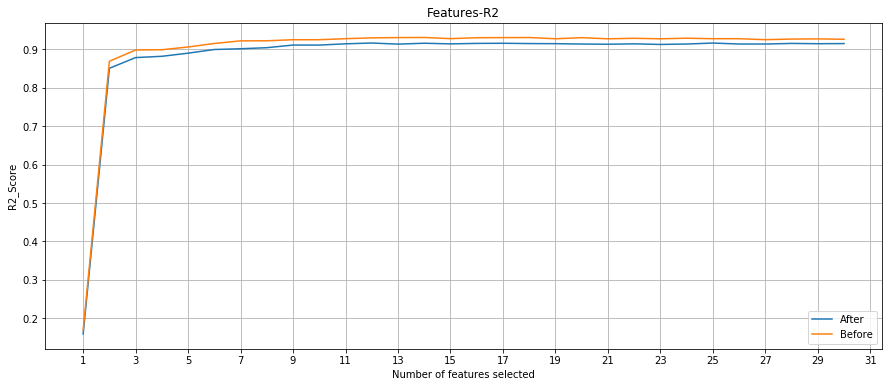

In [30]:
# 画出不同特征数量下得分
plt.figure(figsize=(15,6))
plt.title("Features-R2")
#  选择的特征数量
plt.xlabel("Number of features selected")
# 交叉验证得分
plt.ylabel("R2_Score")

# 修改横轴坐标刻度
xticks(np.linspace(1,31,16,endpoint=True))
# yticks(np.linspace(0.7,1,7,endpoint=True))

# 画出各个特征的得分
plt.plot(range(1, len(score_list_1[:30])+1),score_list_1[:30])
plt.plot(range(1, len(score_list_2[:30])+1),score_list_2[:30])
plt.legend(['After', 'Before'])

plt.grid()
plt.show()

In [87]:
b = 6
print('Rdkit+Mordrd','R2:',score_list_1[b-1],'Features:',screening_features_1[b-1])
print('Rdkit','R2:',score_list_1[b-1],'Features:',screening_features_1[b-1])
print('Mordrd','R2:',score_list_1[b-1],'Features:',screening_features_1[b-1])

Rdkit+Mordrd R2: 0.9164352852436457 Features: Index(['Temperature', 'ATS0s', 'ATS0pe', 'ATSC0m', 'NumValenceElectrons',
       'Kappa2'],
      dtype='object')
Rdkit R2: 0.923251070396506 Features: Index(['Temperature', 'MaxEStateIndex', 'Chi0n', 'Kappa2', 'Kappa3',
       'SlogP_VSA2'],
      dtype='object')
Mordrd R2: 0.9217459213190613 Features: Index(['Temperature', 'ATS0s', 'ATS0pe', 'ATSC0m', 'AATSC1i', 'mZagreb1'], dtype='object')


In [90]:
# 选择几个特征
c = 6
select_features = screening_features_2[c-1]
select_features = select_features.insert(0,"Cp")
select_features = select_features.insert(0,"NAME")
data.loc[:,select_features].to_excel("Data/Cp-Mordred+Rdkit_only-GBRT-6-fearures.xlsx")
pd.read_excel('Data/Cp-Mordred+Rdkit_only-GBRT-6-fearures.xlsx',index_col=0).head()

,NAME,Cp,Temperature,ATS0s,ATS0pe,ATSC0m,NumValenceElectrons,Kappa2
0,56-23-5,131.3,298.15,8.805908,46.4449,439.509377,32,1.741848
1,56-23-5,133.1,301.20,8.805908,46.4449,439.509377,32,1.741848
2,56-23-5,130.5,303.30,8.805908,46.4449,439.509377,32,1.741848
3,56-23-5,131.5,293.00,8.805908,46.4449,439.509377,32,1.741848
4,56-81-5,218.9,298.15,122.277778,93.7283,603.017390,38,3.084918


In [91]:
pd.DataFrame(list(zip(screening_features_2,score_list_2))).to_excel("Data/Cp-Mordred+Rdkit_only-GBRT-score_list.xlsx")